In [27]:
import csv
import math
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score,precision_score,accuracy_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
plt.rcParams['axes.unicode_minus'] = False  


In [28]:
# 计算欧氏距离
def odistance(instance1, instance2):
    return math.sqrt(sum(pow(a - b, 2) for a, b in zip(instance1[:-1], instance2[:-1])))


In [29]:
#计算曼哈顿距离
def mdistance(instance1, instance2):
    return sum(abs(a - b) for a, b in zip(instance1[:-1], instance2[:-1]))
    

In [31]:
class KNN:
    def __init__(self, k=3, distance_type='euclidean', algorithm='auto'):
        self.k = k
        self.distance_type = distance_type
        self.algorithm = algorithm
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def get_distance(self, instance1, instance2):
        if self.distance_type == 'euclidean':
            return odistance(instance1, instance2)
        elif self.distance_type == 'manhattan':
            return mdistance(instance1, instance2)
    def predict(self, X):
        predictions = []
        for test_instance in X:
            
            distances = [self.get_distance(test_instance, x_train) for x_train in self.X_train]
            
            k_indices = np.argsort(distances)[:self.k]
            
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            
            
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

In [32]:
def hunxiaojuzhen(actual, predictions):
    cm = confusion_matrix(actual, predictions)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(set(actual)))
    plt.xticks(tick_marks, set(actual), rotation=45)
    plt.yticks(tick_marks, set(actual))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

乳腺癌诊断

In [33]:
# 加载数据集
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\wisc_bc_data.csv')

# 使用样式
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,843786,M,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,844359,M,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,84458202,M,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,844981,M,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,84501001,M,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
# 将类别信息移到最后一列以便作为目标变量
change = data.select_dtypes(exclude=[np.number]).columns
if change.any():
    data = data[[col for col in data if col not in change] + [change[0]]]
    print("类别已移到最后一列。")
data = data.drop('id', axis=1)#由于第一列为无关变量id，删去第一列
display(data.head(10).style.set_properties(**{'border': '1px solid black'}))

类别已移到最后一列。


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,M
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,M
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,M
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,M
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,M
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400,M
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680,M
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100,M
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200,M
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500,M


In [36]:
# 分离特征和目标变量
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]  # 目标变量

In [37]:
# 如果目标变量是类别型的，需要将其编码为数字
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("目标变量已编码为数字。")

# 目标变量可视化
print("目标变量：")
display(pd.DataFrame(y, columns=['Encoded Target']).head(10).style.set_properties(**{'border': '1px solid black'}))
 

mapping_df = pd.DataFrame(list(le.classes_), columns=['Original Category'])
mapping_df['Encoded Category'] = le.transform(le.classes_)
print("类别编码映射：")
display(mapping_df.style.set_properties(**{'border': '1px solid black'}))

目标变量已编码为数字。
目标变量：


,Encoded Target
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


类别编码映射：


,Original Category,Encoded Category
0,B,0
1,M,1


In [38]:
# 用均值处理缺失值
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
print("缺失值已处理。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))


缺失值已处理。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


In [39]:
#用StandardScaler 类来进行特征缩放，将所有特征的取值范围都缩放到均值为 0，标准差为 1 的范围内
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("特征已缩放。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

特征已缩放。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,-0.255070,-0.592662,-0.321304,-0.289258,0.156347,0.445544,0.160025,-0.069124,0.134119,0.486846,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0.149883,-0.804940,0.155410,0.298627,-0.909030,-0.651568,-0.310141,-0.228089,-0.829666,-0.611218,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0.643623,0.290561,0.490051,0.233722,0.588031,0.268933,-0.232554,0.435349,-0.688004,0.611669,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.227743,-0.352403,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,-0.388250,0.693345,-0.409420,-0.360764,0.036008,2.609587,1.509848,0.409395,-0.321136,2.377346,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [40]:
# 划分训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.67, random_state=42)

In [41]:
k_values = range(1, 10)
accuracies = []

for k in k_values:

    knn = KNN(k=k, distance_type='euclidean')
    
 
    knn.fit(Xtrain, ytrain)
    
    predictions = knn.predict(Xtest)
    
    # 计算准确率
    correct = sum(pred == actual for pred, actual in zip(predictions, ytest))
    accuracy = correct / len(ytest) * 100
    accuracies.append(accuracy)
    print(f"k={k}: 模型的准确率为 {accuracy:.2f}%")
    
    

k=1: 模型的准确率为 95.29%
k=2: 模型的准确率为 95.29%
k=3: 模型的准确率为 96.07%
k=4: 模型的准确率为 96.07%
k=5: 模型的准确率为 95.81%
k=6: 模型的准确率为 95.81%
k=7: 模型的准确率为 96.34%
k=8: 模型的准确率为 96.34%
k=9: 模型的准确率为 95.81%


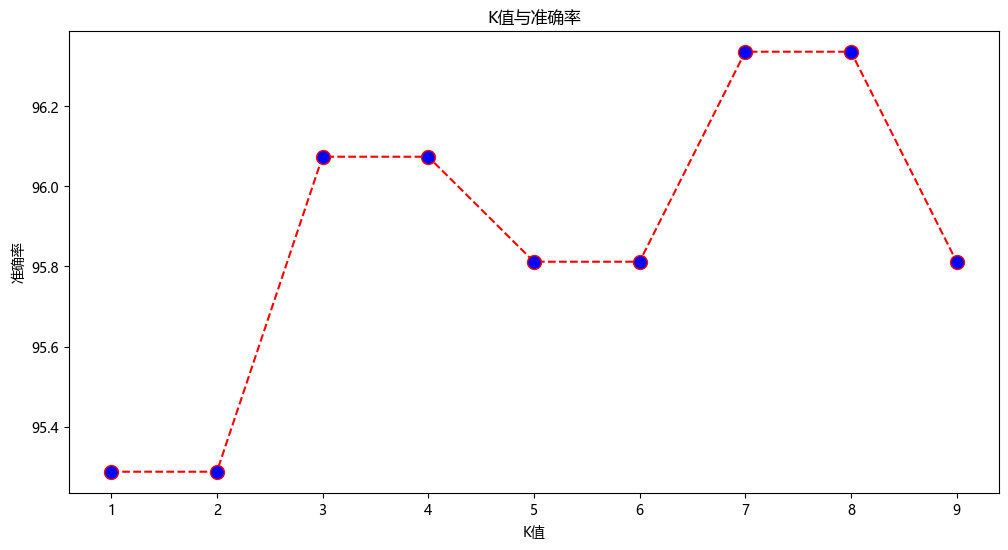

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K值与准确率')
plt.xlabel('K值')
plt.ylabel('准确率')
plt.show()


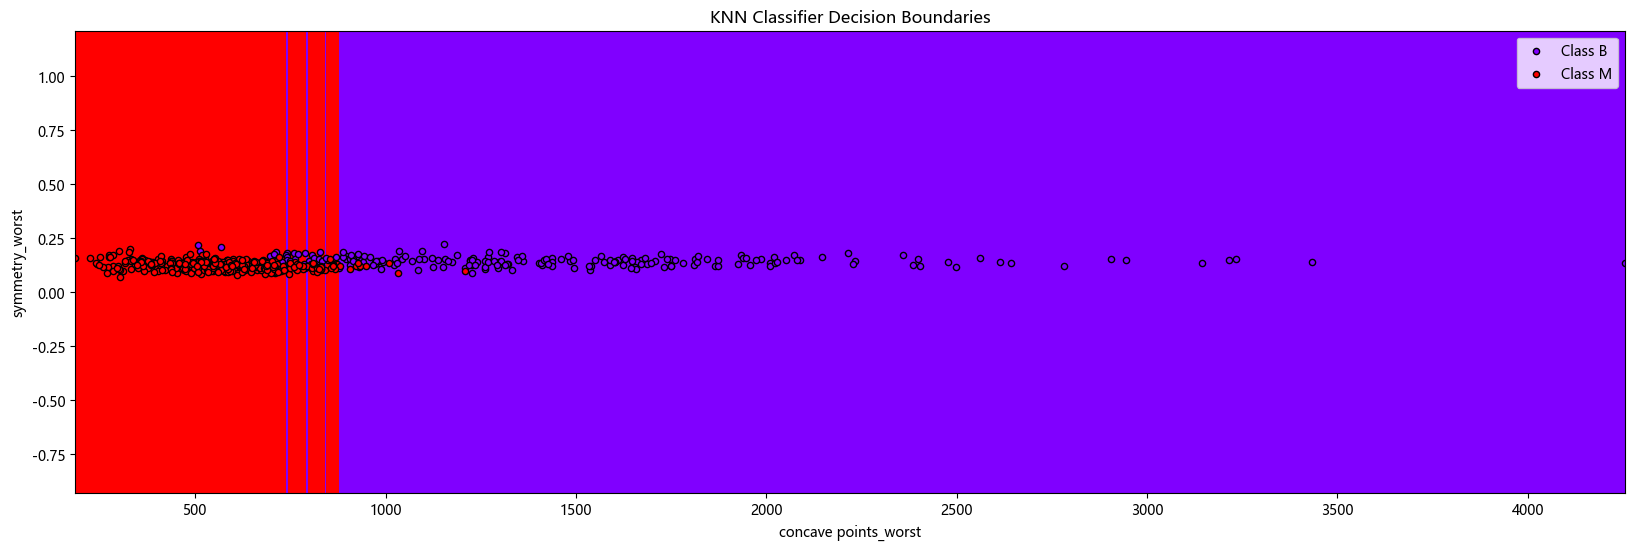

In [23]:
X = data.iloc[:, -8:-6].values
y = data.iloc[:, -1]

y_encoded, unique_labels = pd.factorize(y)
num_classes = len(unique_labels)

cmap_light = ListedColormap([plt.cm.rainbow(i) for i in np.linspace(0, 1, num_classes)])
cmap_bold = [plt.cm.rainbow(i) for i in np.linspace(0, 1, num_classes)]

n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X, y_encoded)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(20, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

unique_labels = np.unique(y)
for i, label in enumerate(unique_labels):
    plt.scatter(X[y_encoded == i, 0], X[y_encoded == i, 1],
                color=cmap_bold[i],
                label=f'Class {label}',
                edgecolor='black',
                lw=1, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('concave points_worst')
plt.ylabel('symmetry_worst')
plt.title("KNN Classifier Decision Boundaries")
plt.legend()
plt.show()

模型的准确率为：0.9633507853403142
模型的精度为：0.9587194107864101
召回率为：0.9616810138689622


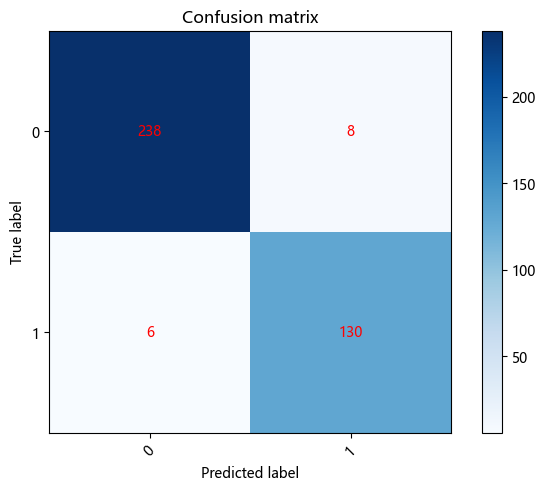

In [43]:
k = 7 
# 使用最优的k值训练模型并进行预测
knn = KNN(k=k, distance_type='euclidean')
knn.fit(Xtrain, ytrain)
predictions = knn.predict(Xtest)
# 计算准确率
accuracy = accuracy_score(ytest, predictions)
print(f'模型的准确率为：{accuracy}')
# 计算精度
precision = precision_score(ytest, predictions, average='macro')
print(f'模型的精度为：{precision}')
# 计算召回率
recall = recall_score(ytest, predictions, average='macro')

print(f'召回率为：{recall}')
# 绘制混淆矩阵
hunxiaojuzhen(ytest, predictions)

字符识别

In [44]:
# 加载数据集
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\letterecognition.csv')

# 使用样式
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [46]:
# 将类别信息移到最后一列以便作为目标变量
change = data.select_dtypes(exclude=[np.number]).columns
if change.any():
    data = data[[col for col in data if col not in change] + [change[0]]]
    print("类别已移到最后一列。")
display(data.head(10).style.set_properties(**{'border': '1px solid black'}))

类别已移到最后一列。


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
5,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,S
6,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10,B
7,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7,A
8,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7,J
9,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8,M


In [47]:
# 分离特征和目标变量
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]  # 目标变量

In [51]:
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("目标变量已编码为数字。")

# 目标变量可视化
print("目标变量：")
display(pd.DataFrame(y, columns=['Encoded Target']).head(10).style.set_properties(**{'border': '1px solid black'}))
 

mapping_df = pd.DataFrame(list(le.classes_), columns=['Original Category'])
mapping_df['Encoded Category'] = le.transform(le.classes_)
print("类别编码映射：")
display(mapping_df.style.set_properties(**{'border': '1px solid black'}))

目标变量：


,Encoded Target
0,19
1,8
2,3
3,13
4,6
5,18
6,1
7,0
8,9
9,12


类别编码映射：


,Original Category,Encoded Category
0,A,0
1,B,1
2,C,2
3,D,3
4,E,4
5,F,5
6,G,6
7,H,7
8,I,8
9,J,9


In [52]:
# 用均值处理缺失值
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
print("缺失值已处理。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))


缺失值已处理。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
5,-0.012309,1.199738,-0.060486,1.161947,-0.230939,0.544130,0.214833,0.507945,1.605094,-1.318933,-0.172558,-0.927151,-1.305948,-0.219082,2.067874,-0.495354
6,-0.012309,-1.523844,-0.060486,-0.606921,0.225598,0.544130,-0.215220,0.507945,0.344994,-0.515208,-0.172558,-0.927151,-0.448492,-0.219082,1.288757,1.359441
7,-1.580393,-1.826464,-1.053277,-1.491354,-1.144013,0.544130,-2.365484,-0.973591,-1.335139,-0.113345,-1.692890,0.034125,-0.877220,-1.512171,-0.659036,-0.495354
8,-1.057698,-1.523844,-0.556881,-0.606921,-0.687476,1.531305,-0.645273,-0.973591,0.344994,1.494105,-0.932724,0.034125,-0.877220,-1.512171,-1.048594,-0.495354
9,3.646551,2.410218,3.910678,1.604164,1.595209,3.012066,-2.365484,0.507945,-1.335139,1.494105,-2.072973,0.514764,2.123874,-4.744894,-1.048594,0.122911


In [53]:
#用StandardScaler 类来进行特征缩放，将所有特征的取值范围都缩放到均值为 0，标准差为 1 的范围内
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("特征已缩放。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

特征已缩放。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
5,-0.012309,1.199738,-0.060486,1.161947,-0.230939,0.544130,0.214833,0.507945,1.605094,-1.318933,-0.172558,-0.927151,-1.305948,-0.219082,2.067874,-0.495354
6,-0.012309,-1.523844,-0.060486,-0.606921,0.225598,0.544130,-0.215220,0.507945,0.344994,-0.515208,-0.172558,-0.927151,-0.448492,-0.219082,1.288757,1.359441
7,-1.580393,-1.826464,-1.053277,-1.491354,-1.144013,0.544130,-2.365484,-0.973591,-1.335139,-0.113345,-1.692890,0.034125,-0.877220,-1.512171,-0.659036,-0.495354
8,-1.057698,-1.523844,-0.556881,-0.606921,-0.687476,1.531305,-0.645273,-0.973591,0.344994,1.494105,-0.932724,0.034125,-0.877220,-1.512171,-1.048594,-0.495354
9,3.646551,2.410218,3.910678,1.604164,1.595209,3.012066,-2.365484,0.507945,-1.335139,1.494105,-2.072973,0.514764,2.123874,-4.744894,-1.048594,0.122911


In [54]:
# 划分训练集和测试集
y = pd.Series(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.67, random_state=42)
ytrain = ytrain.reset_index(drop=True)#重置索引


In [31]:
k_values = [2,4,6,8,10]
accuracies = []

for k in k_values:

    knn = KNN(k=k, distance_type='euclidean')
    
 
    knn.fit(Xtrain, ytrain)
    
    predictions = knn.predict(Xtest)
    
    # 计算准确率
    correct = sum(pred == actual for pred, actual in zip(predictions, ytest))
    accuracy = correct / len(ytest) * 100
    accuracies.append(accuracy)
    print(f"k={k}: 模型的准确率为 {accuracy:.2f}%")

k=2: 模型的准确率为 90.28%
k=4: 模型的准确率为 90.19%
k=6: 模型的准确率为 89.65%
k=8: 模型的准确率为 88.99%
k=10: 模型的准确率为 88.47%


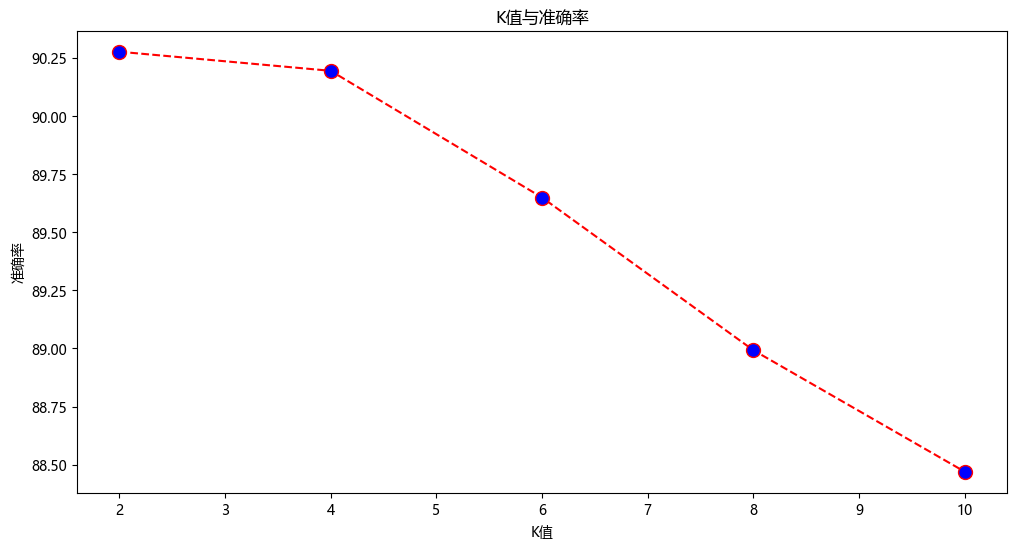

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('K值与准确率')
plt.xlabel('K值')
plt.ylabel('准确率')
plt.show()


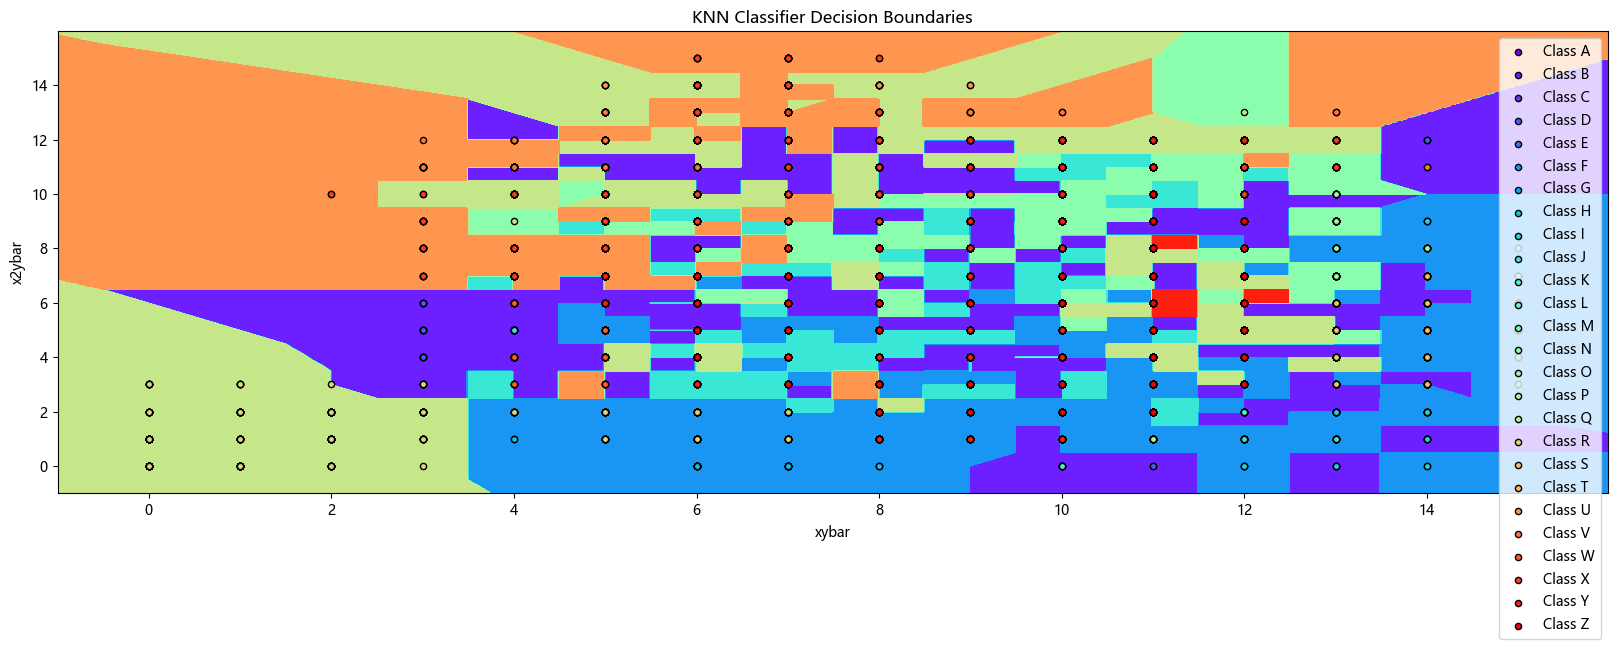

In [35]:
X = data.iloc[:, -8:-6].values
y = data.iloc[:, -1]
y_encoded, unique_labels = pd.factorize(y)
num_classes = len(unique_labels)
cmap_light = ListedColormap([plt.cm.rainbow(i) for i in np.linspace(0, 1, num_classes)])
cmap_bold = [plt.cm.rainbow(i) for i in np.linspace(0, 1, num_classes)]
n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X, y_encoded)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
unique_labels = np.unique(y)
for i, label in enumerate(unique_labels):
    plt.scatter(X[y_encoded == i, 0], X[y_encoded == i, 1],
                color=cmap_bold[i],
                label=f'Class {label}',
                edgecolor='black',
                lw=1, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('xybar')
plt.ylabel('x2ybar')
plt.title("KNN Classifier Decision Boundaries")
plt.legend()
plt.show()


模型的准确率为：0.9027611940298508
模型的精度为：0.9030308732862717
召回率为：0.9021623519255465


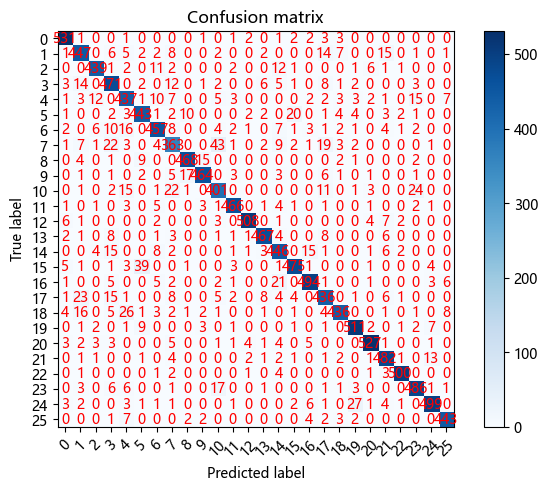

In [56]:
k = 2
# 使用最优的k值训练模型并进行预测
knn = KNN(k=k, distance_type='euclidean')
knn.fit(Xtrain, ytrain)
predictions = knn.predict(Xtest)
# 计算准确率
accuracy = accuracy_score(ytest, predictions)
print(f'模型的准确率为：{accuracy}')
# 计算精度
precision = precision_score(ytest, predictions, average='macro')
print(f'模型的精度为：{precision}')
# 计算召回率
recall = recall_score(ytest, predictions, average='macro')
print(f'召回率为：{recall}')
# 绘制混淆矩阵
hunxiaojuzhen(ytest, predictions)

个人征信

In [57]:
# 加载数据集
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\credit.csv')

# 使用样式
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,4,unknown/none,35,none,for free,1,unskilled resident,2,yes,yes,1
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,4,building society savings,53,none,own,1,skilled employee,1,none,yes,1
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,2,other,35,none,rent,1,mangement self-employed,1,yes,yes,1
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,4,real estate,61,none,own,1,unskilled resident,1,none,yes,1
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,2,other,28,none,own,2,mangement self-employed,1,none,yes,2


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [59]:
# 初始化标签编码器
label_encoder = LabelEncoder()
# 创建一个字典来记录每个原始标签到编码的映射
label_mappings = {}

# 对于数据中的每一个非数值型列，进行标签编码
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
    # 记录当前列的映射
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# 输出映射关系
label_mappings

{'checking_balance': {'1 - 200 DM': 0,
  '< 0 DM': 1,
  '> 200 DM': 2,
  'unknown': 3},
 'credit_history': {'critical': 0,
  'delayed': 1,
  'fully repaid': 2,
  'fully repaid this bank': 3,
  'repaid': 4},
 'purpose': {'business': 0,
  'car (new)': 1,
  'car (used)': 2,
  'domestic appliances': 3,
  'education': 4,
  'furniture': 5,
  'others': 6,
  'radio/tv': 7,
  'repairs': 8,
  'retraining': 9},
 'savings_balance': {'101 - 500 DM': 0,
  '501 - 1000 DM': 1,
  '< 100 DM': 2,
  '> 1000 DM': 3,
  'unknown': 4},
 'employment_length': {'0 - 1 yrs': 0,
  '1 - 4 yrs': 1,
  '4 - 7 yrs': 2,
  '> 7 yrs': 3,
  'unemployed': 4},
 'personal_status': {'divorced male': 0,
  'female': 1,
  'married male': 2,
  'single male': 3},
 'other_debtors': {'co-applicant': 0, 'guarantor': 1, 'none': 2},
 'property': {'building society savings': 0,
  'other': 1,
  'real estate': 2,
  'unknown/none': 3},
 'installment_plan': {'bank': 0, 'none': 1, 'stores': 2},
 'housing': {'for free': 0, 'own': 1, 'rent': 2}

In [60]:
# 显示编码后的前10行数据
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,1,6,0,7,1169,4,3,4,3,2,4,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,2,2,22,1,1,1,1,1,0,1,2
2,3,12,0,4,2096,2,2,2,3,2,3,2,49,1,1,1,3,2,0,1,1
3,1,42,4,5,7882,2,2,2,3,1,4,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,4,3,53,1,0,2,1,2,0,1,2
5,3,36,4,4,9055,4,1,2,3,2,4,3,35,1,0,1,3,2,1,1,1
6,3,24,4,5,2835,1,3,3,3,2,4,0,53,1,1,1,1,1,0,1,1
7,0,36,4,2,6948,2,1,2,3,2,2,1,35,1,2,1,0,1,1,1,1
8,3,12,4,7,3059,3,2,2,0,2,4,2,61,1,1,1,3,1,0,1,1
9,0,30,0,1,5234,2,4,4,2,2,2,1,28,1,1,2,0,1,0,1,2


In [61]:
# 分离特征和目标变量
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]  # 目标变量

In [62]:
# 用均值处理缺失值
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
print("缺失值已处理。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))


缺失值已处理。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,6.000000,0.000000,7.000000,1169.000000,4.000000,3.000000,4.000000,3.000000,2.000000,4.000000,2.000000,67.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
1,0.000000,48.000000,4.000000,7.000000,5951.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
2,3.000000,12.000000,0.000000,4.000000,2096.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,49.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,1.000000
3,1.000000,42.000000,4.000000,5.000000,7882.000000,2.000000,2.000000,2.000000,3.000000,1.000000,4.000000,0.000000,45.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000
4,1.000000,24.000000,1.000000,1.000000,4870.000000,2.000000,1.000000,3.000000,3.000000,2.000000,4.000000,3.000000,53.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000
5,3.000000,36.000000,4.000000,4.000000,9055.000000,4.000000,1.000000,2.000000,3.000000,2.000000,4.000000,3.000000,35.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000
6,3.000000,24.000000,4.000000,5.000000,2835.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,0.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
7,0.000000,36.000000,4.000000,2.000000,6948.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,35.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
8,3.000000,12.000000,4.000000,7.000000,3059.000000,3.000000,2.000000,2.000000,0.000000,2.000000,4.000000,2.000000,61.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000
9,0.000000,30.000000,0.000000,1.000000,5234.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,28.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000


In [63]:
#用StandardScaler 类来进行特征缩放，将所有特征的取值范围都缩放到均值为 0，标准差为 1 的范围内
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("特征已缩放。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

特征已缩放。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.464594,-1.236478,-1.352825,1.151303,-0.745131,1.669901,1.090469,0.918477,0.845685,0.301109,1.046987,0.641411,2.766456,0.218346,-0.133710,1.027079,-0.289639,-0.428290,1.214598,0.196014
1,-1.262865,2.248194,0.869475,1.151303,0.949817,-0.130531,-0.579468,-0.870183,-1.116461,0.301109,-0.765977,0.641411,-1.191404,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
2,1.131948,-0.738668,-1.352825,0.047818,-0.416562,-0.130531,0.255500,-0.870183,0.845685,0.301109,0.140505,0.641411,1.183312,0.218346,-0.133710,-0.704926,1.824516,2.334869,-0.823318,0.196014
3,-0.464594,1.750384,0.869475,0.415646,1.634247,-0.130531,0.255500,-0.870183,0.845685,-1.945974,1.046987,-1.356755,0.831502,0.218346,-2.016956,-0.704926,-0.289639,2.334869,-0.823318,0.196014
4,-0.464594,0.256953,-0.797250,-1.055668,0.566664,-0.130531,-0.579468,0.024147,0.845685,0.301109,1.046987,1.640495,1.535122,0.218346,-2.016956,1.027079,-0.289639,2.334869,-0.823318,0.196014
5,1.131948,1.252574,0.869475,0.047818,2.050009,1.669901,-0.579468,-0.870183,0.845685,0.301109,1.046987,1.640495,-0.048022,0.218346,-2.016956,-0.704926,1.824516,2.334869,1.214598,0.196014
6,1.131948,0.256953,0.869475,0.415646,-0.154629,-1.030748,1.090469,0.024147,0.845685,0.301109,1.046987,-1.356755,1.535122,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
7,-1.262865,1.252574,0.869475,-0.687839,1.303197,-0.130531,-0.579468,-0.870183,0.845685,0.301109,-0.765977,-0.357672,-0.048022,0.218346,1.749535,-0.704926,-1.346717,-0.428290,1.214598,0.196014
8,1.131948,-0.738668,0.869475,1.151303,-0.075233,0.769685,0.255500,-0.870183,-2.097535,0.301109,1.046987,0.641411,2.238742,0.218346,-0.133710,-0.704926,1.824516,-0.428290,-0.823318,0.196014
9,-1.262865,0.754763,-1.352825,-1.055668,0.695681,-0.130531,1.925438,0.918477,-0.135388,0.301109,-0.765977,-0.357672,-0.663689,0.218346,-0.133710,1.027079,-1.346717,-0.428290,-0.823318,0.196014


In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.67, random_state=42)
ytrain = ytrain.reset_index(drop=True)#重置索引

In [45]:
k_values = range(1, 20)
accuracies = []

for k in k_values:

    knn = KNN(k=k, distance_type='euclidean')
    
 
    knn.fit(Xtrain, ytrain)
    
    predictions = knn.predict(Xtest)
    
    # 计算准确率
    correct = sum(pred == actual for pred, actual in zip(predictions, ytest))
    accuracy = correct / len(ytest) * 100
    accuracies.append(accuracy)
    print(f"k={k}: 模型的准确率为 {accuracy:.2f}%")

k=1: 模型的准确率为 65.52%
k=2: 模型的准确率为 65.52%
k=3: 模型的准确率为 68.51%
k=4: 模型的准确率为 69.10%
k=5: 模型的准确率为 69.85%
k=6: 模型的准确率为 70.75%
k=7: 模型的准确率为 71.64%
k=8: 模型的准确率为 71.49%
k=9: 模型的准确率为 73.43%
k=10: 模型的准确率为 71.04%
k=11: 模型的准确率为 71.64%
k=12: 模型的准确率为 71.34%
k=13: 模型的准确率为 71.34%
k=14: 模型的准确率为 71.04%
k=15: 模型的准确率为 71.04%
k=16: 模型的准确率为 71.34%
k=17: 模型的准确率为 71.79%
k=18: 模型的准确率为 71.49%
k=19: 模型的准确率为 70.30%


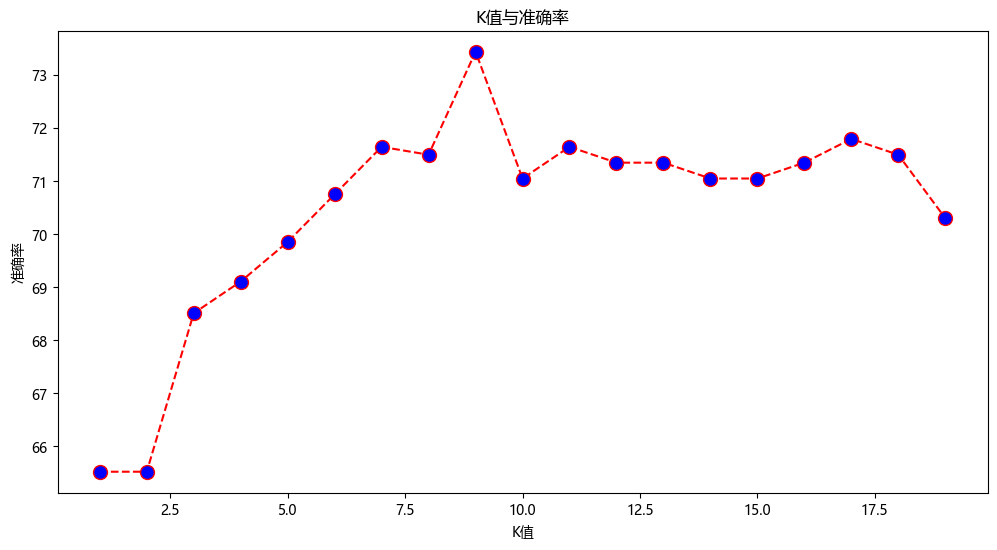

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K值与准确率')
plt.xlabel('K值')
plt.ylabel('准确率')
plt.show()


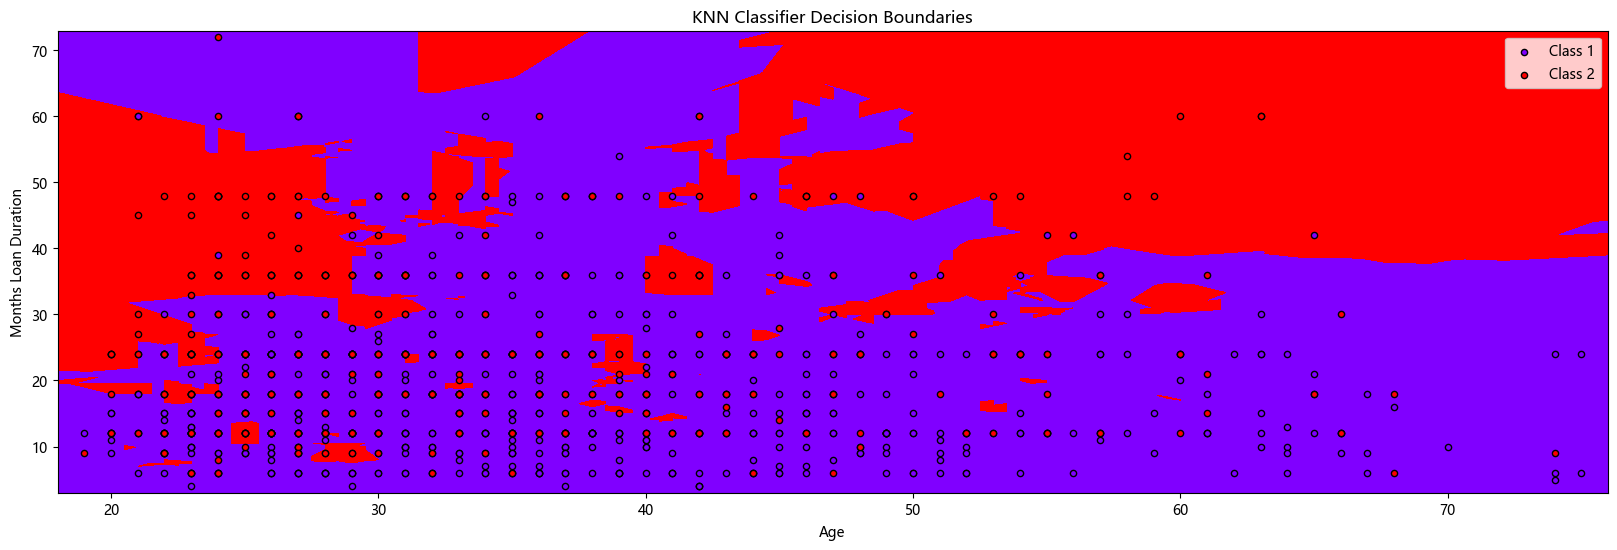

In [48]:
X = data[['age', 'months_loan_duration']].values
y = data['default'].values 
num_classes = len(np.unique(y))


cmap_light = ListedColormap([plt.cm.rainbow(i) for i in np.linspace(0, 1, num_classes)])
cmap_bold = [plt.cm.rainbow(i) for i in np.linspace(0, 1, num_classes)]


n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02  


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(20, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
unique_labels = np.unique(y)
for i, label in enumerate(unique_labels):
    plt.scatter(X[y == label, 0], X[y == label, 1],
                color=cmap_bold[i],
                label=f'Class {label}',
                edgecolor='black',
                lw=1, s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Months Loan Duration')
plt.title("KNN Classifier Decision Boundaries")
plt.legend()
plt.show()


模型的准确率为：0.7343283582089553
模型的精度为：0.6836225784132841
召回率为：0.63400446015316


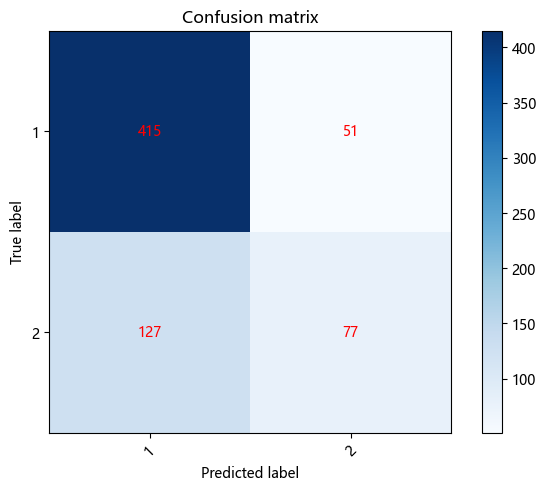

In [66]:
k = 9
knn = KNN(k=k, distance_type='euclidean')
knn.fit(Xtrain, ytrain)
predictions = knn.predict(Xtest)
# 计算准确率
accuracy = accuracy_score(ytest, predictions)
print(f'模型的准确率为：{accuracy}')
# 计算精度
precision = precision_score(ytest, predictions, average='macro')
print(f'模型的精度为：{precision}')
# 计算召回率
recall = recall_score(ytest, predictions, average='macro')
print(f'召回率为：{recall}')
# 绘制混淆矩阵
hunxiaojuzhen(ytest, predictions)

玻璃类别

In [67]:
# 加载数据集
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\glass.csv',header=None)

# 使用样式
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data


,0,1,2,3,4,5,6,7,8,9,10
0,1,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000,1
1,2,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1
2,3,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1
3,4,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000,1
4,5,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1
5,6,1.515960,12.790000,3.610000,1.620000,72.970000,0.640000,8.070000,0.000000,0.260000,1
6,7,1.517430,13.300000,3.600000,1.140000,73.090000,0.580000,8.170000,0.000000,0.000000,1
7,8,1.517560,13.150000,3.610000,1.050000,73.240000,0.570000,8.240000,0.000000,0.000000,1
8,9,1.519180,14.040000,3.580000,1.370000,72.080000,0.560000,8.300000,0.000000,0.000000,1
9,10,1.517550,13.000000,3.600000,1.360000,72.990000,0.570000,8.400000,0.000000,0.110000,1


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    int64  
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    float64
 10  10      214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [69]:
# 分离特征和目标变量
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]  # 目标变量

In [70]:
# 用均值处理缺失值
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
print("缺失值已处理。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

缺失值已处理。


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000
1,2.000000,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
2,3.000000,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000
3,4.000000,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000
4,5.000000,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000
5,6.000000,1.515960,12.790000,3.610000,1.620000,72.970000,0.640000,8.070000,0.000000,0.260000
6,7.000000,1.517430,13.300000,3.600000,1.140000,73.090000,0.580000,8.170000,0.000000,0.000000
7,8.000000,1.517560,13.150000,3.610000,1.050000,73.240000,0.570000,8.240000,0.000000,0.000000
8,9.000000,1.519180,14.040000,3.580000,1.370000,72.080000,0.560000,8.300000,0.000000,0.000000
9,10.000000,1.517550,13.000000,3.600000,1.360000,72.990000,0.570000,8.400000,0.000000,0.110000


In [71]:
#用StandardScaler 类来进行特征缩放，将所有特征的取值范围都缩放到均值为 0，标准差为 1 的范围内
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("特征已缩放。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

特征已缩放。


,0,1,2,3,4,5,6,7,8,9
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
5,-1.643038,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150
6,-1.626851,-0.308744,-0.132382,0.636168,-0.612137,0.568197,0.127475,-0.554268,-0.352877,-0.586451
7,-1.610663,-0.265836,-0.316500,0.643117,-0.792823,0.762313,0.112107,-0.504966,-0.352877,-0.586451
8,-1.594475,0.268859,0.775936,0.622270,-0.150384,-0.738850,0.096738,-0.462707,-0.352877,-0.586451
9,-1.578288,-0.269137,-0.500618,0.636168,-0.170460,0.438787,0.112107,-0.392276,-0.352877,0.545111


In [72]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.67, random_state=42)
ytrain = ytrain.reset_index(drop=True)#重置索引

In [383]:
k_values = range(1, 10)
accuracies = []

for k in k_values:

    knn = KNN(k=k, distance_type='euclidean')
    
 
    knn.fit(Xtrain, ytrain)
    
    predictions = knn.predict(Xtest)
    
    # 计算准确率
    correct = sum(pred == actual for pred, actual in zip(predictions, ytest))
    accuracy = correct / len(ytest) * 100
    accuracies.append(accuracy)
    print(f"k={k}: 模型的准确率为 {accuracy:.2f}%")

k=1: 模型的准确率为 84.03%
k=2: 模型的准确率为 84.03%
k=3: 模型的准确率为 82.64%
k=4: 模型的准确率为 86.11%
k=5: 模型的准确率为 83.33%
k=6: 模型的准确率为 81.94%
k=7: 模型的准确率为 81.25%
k=8: 模型的准确率为 81.25%
k=9: 模型的准确率为 81.25%


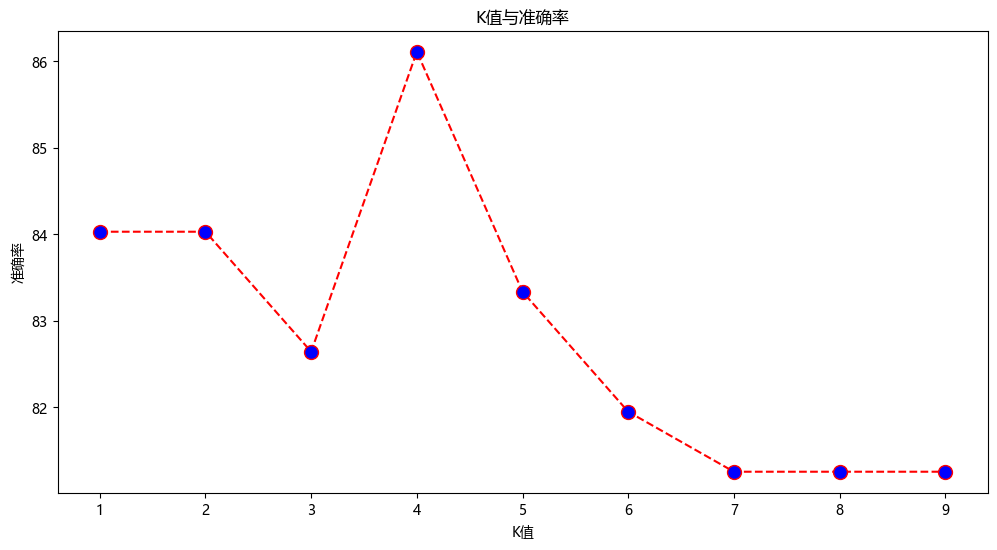

In [384]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K值与准确率')
plt.xlabel('K值')
plt.ylabel('准确率')
plt.show()


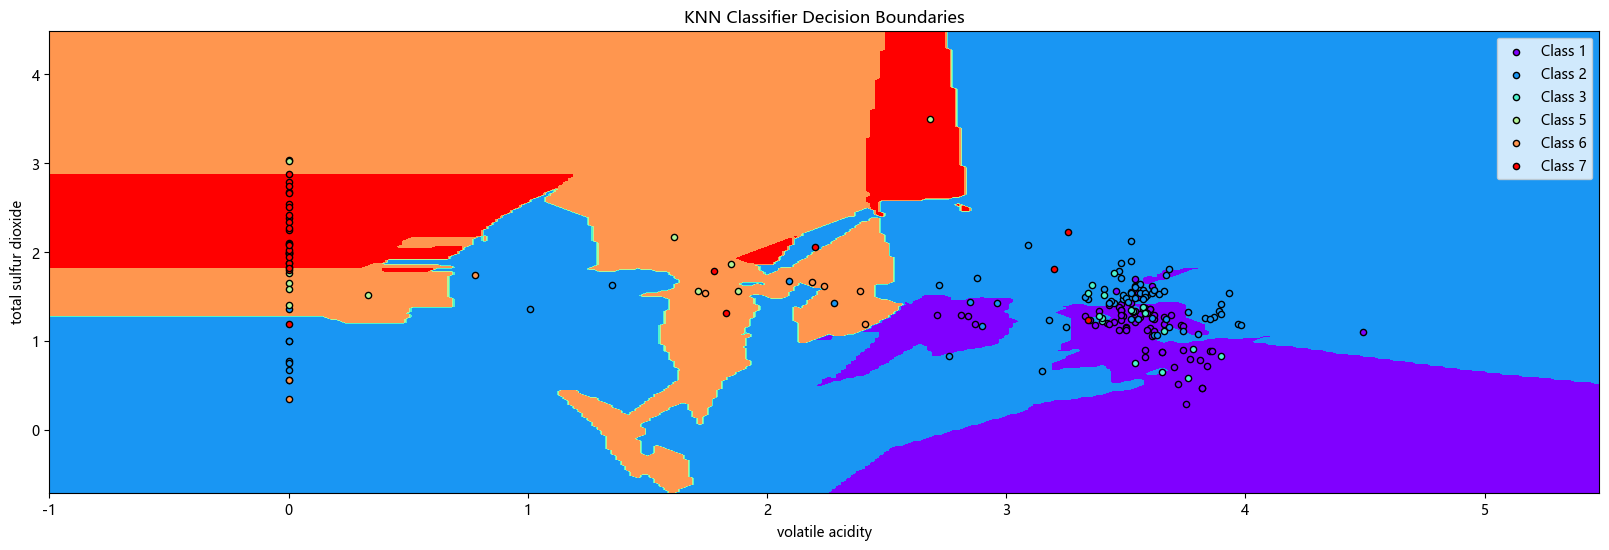

In [390]:
X = data.iloc[:, -8:-6].values
y = data.iloc[:, -1].values
num_classes = len(np.unique(y))

cmap_light = ListedColormap([plt.cm.rainbow(i) for i in np.linspace(0, 1, num_classes)])
cmap_bold = [plt.cm.rainbow(i) for i in np.linspace(0, 1, num_classes)]

n_neighbors = 4
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02 


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(20, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
unique_labels = np.unique(y)
for i, label in enumerate(unique_labels):
    plt.scatter(X[y == label, 0], X[y == label, 1],
                color=cmap_bold[i],
                label=f'Class {label}',
                edgecolor='black',
                lw=1, s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('volatile acidity')
plt.ylabel('total sulfur dioxide')
plt.title("KNN Classifier Decision Boundaries")
plt.legend()
plt.show()


模型的准确率为：0.8611111111111112
模型的精度为：0.8785645232079523
召回率为：0.7399031193674052


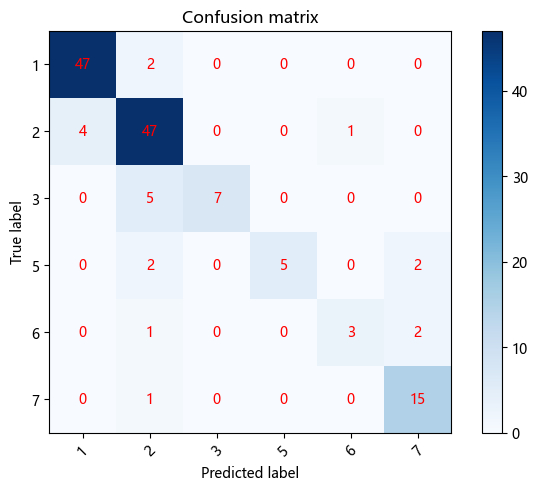

In [73]:
k = 4

# 使用选择的k值训练模型并进行预测
knn = KNN(k=k, distance_type='euclidean')
knn.fit(Xtrain, ytrain)
predictions = knn.predict(Xtest)
# 计算准确率
accuracy = accuracy_score(ytest, predictions)
print(f'模型的准确率为：{accuracy}')
# 计算精度
precision = precision_score(ytest, predictions, average='macro')
print(f'模型的精度为：{precision}')
# 计算召回率
recall = recall_score(ytest, predictions, average='macro')
print(f'召回率为：{recall}')
# 绘制混淆矩阵
hunxiaojuzhen(ytest, predictions)